In [ ]:
!pip install autokeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.4/548.4 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 37.9 MB/s eta 0:00:00


In [ ]:
!pip list


Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.7.0.32.46
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

In [ ]:
import os
import pathlib
import numpy as np
import tensorflow as tf
import autokeras as ak

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import autokeras as ak
print(tf.__version__)


2.17.0


In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',
                                   origin=dataset_url,
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
batch_size = 32
img_height = 240
img_width = 240

train_data = ak.image_dataset_from_directory(
	data_dir,
	# Use 15% data as testing data.
	validation_split=0.15,
	subset="training",
	# Set seed to ensure the same split when loading testing data.
	seed=23,
	image_size=(img_height, img_width),
	batch_size=batch_size,
)

test_data = ak.image_dataset_from_directory(
	data_dir,
	validation_split=0.15,
	subset="validation",
	seed=23,
	image_size=(img_height, img_width),
	batch_size=batch_size,
)


Found 3670 files belonging to 5 classes.
Using 3120 files for training.
Found 3670 files belonging to 5 classes.
Using 550 files for validation.


In [ ]:
# Image classifier model
image_classifier = ak.ImageClassifier(num_classes = 5,
									multi_label = True,
									overwrite=True,
									max_trials=1)
# Train the model
image_classifier.fit(train_data, epochs=5)


Trial 1 Complete [00h 05m 06s]
val_loss: 0.37324807047843933

Best val_loss So Far: 0.37324807047843933
Total elapsed time: 00h 05m 06s
Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 52s 497ms/step - accuracy: 0.3167 - loss: 1.9017
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 406ms/step - accuracy: 0.6132 - loss: 0.3648
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 412ms/step - accuracy: 0.8122 - loss: 0.2330
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 430ms/step - accuracy: 0.9325 - loss: 0.1208
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 443ms/step - accuracy: 0.9647 - loss: 0.0837


In [ ]:
# Evaluate the model
image_classifier.evaluate(test_data)


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 376ms/step - accuracy: 0.5590 - loss: 0.3665


[0.3663192093372345, 0.5763636231422424]

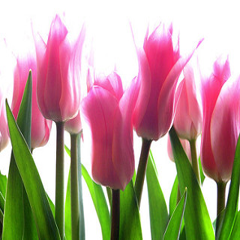

In [ ]:
from PIL import Image

# Provide the path to the image file
image_path = "/content/112428919_f0c5ad7d9d_n.jpg"

# Load and preprocess a new image for prediction
new_image = Image.open(image_path)
# Resize the image
resized_image = new_image.resize((img_height, img_width))
resized_image


In [ ]:

# Expand dimensions to match the expected shape (1, 240, 240, 3)
preprocessed_image = np.expand_dims(resized_image, axis=0)

# Make predictions
predictions = image_classifier.predict(preprocessed_image)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[['tulips']]
